In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Dictionary 

ID : Unique Customer ID

Gender : Gender of the applicant

DOB : Date of Birth of the applicant

Lead_Creation_Date : Date on which Lead was created

City_Code : Anonymised Code for the City

City_Category: Anonymised City Feature

Employer_Code: Anonymised Code for the Employer

Employer_Category1 : Anonymised Employer Feature

Employer_Category2: Anonymised Employer Feature

Monthly_Income : Monthly Income in Dollars

Customer_Existing_Primary_Bank_Code : Anonymised Customer Bank Code

Primary_Bank_Type: Anonymised Bank Feature

Contacted: Contact Verified (Y/N)

Source : Categorical Variable representing source of lead

Source_Category: Type of Source

Existing_EMI : EMI of Existing Loans in Dollars

Loan_Amount: Loan Amount Requested

Loan_Period: Loan Period (Years)

Interest_Rate: Interest Rate of Submitted Loan Amount

EMI: EMI of Requested Loan Amount in dollars

Var1: Anonymized Categorical variable with multiple levels

Approved: (Target) Whether a loan is Approved or not (1-0) . Customer is Qualified Lead or not (1-0)

In [2]:
df_train = pd.read_csv("bank_loan_leads/train_loan/train.csv")

In [3]:
df_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


In [6]:
df_train.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [7]:
df_train.isna().any(axis=1).sum()

49405

In [8]:
income_outliers = df_train[df_train['Monthly_Income'] > 150000].shape
income_outliers

(56, 22)

In [9]:
df_train_1 = df_train[df_train['Monthly_Income'] < 150000]

In [10]:
df_train_1.shape

(69656, 22)

In [11]:
income_outliers = df_train_1[df_train_1['Monthly_Income'] > 60000].shape
income_outliers

(93, 22)

In [12]:
df_train_2 = df_train[df_train['Monthly_Income'] < 60000]

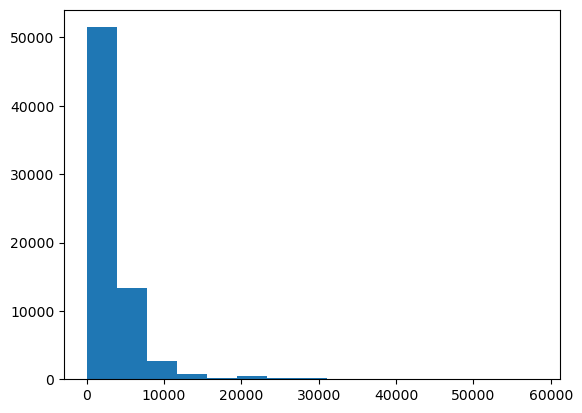

In [13]:
plt.hist(x=df_train_2['Monthly_Income'], bins=15)
plt.show()

# 1. Remove outliers from Monthly_Income by removing rows with Monthly_Income above 20,000. 

In [14]:
df_train_3 = df_train[df_train['Monthly_Income'] < 20000]

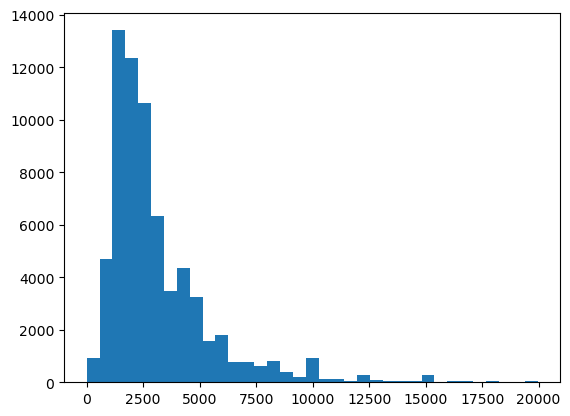

In [15]:
plt.hist(x=df_train_3['Monthly_Income'], bins=35)
plt.show()

In [16]:
df_train_3.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                799
City_Category                            799
Employer_Code                           4001
Employer_Category1                      4001
Employer_Category2                      4271
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9275
Primary_Bank_Type                       9275
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              50
Loan_Amount                            27528
Loan_Period                            27528
Interest_Rate                          46813
EMI                                    46813
Var1                                       0
Approved                                   0
dtype: int

# 2. Convert DOB to datetime format. 

In [17]:
df_train_3['DOB'] = pd.to_datetime(df_train_3['DOB'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_19068\3464313117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['DOB'] = pd.to_datetime(df_train_3['DOB'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')


# 3. Converted Lead_Creation_Date to datetime format. 

In [18]:
df_train_3['Lead_Creation_Date'] = pd.to_datetime(df_train_3['Lead_Creation_Date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_19068\4135966100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['Lead_Creation_Date'] = pd.to_datetime(df_train_3['Lead_Creation_Date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')


In [19]:
df_train_3.head(5)

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


# 4. Added DOB_Year column. 

In [20]:
df_train_3['DOB_Year'] = df_train_3['DOB'].str[:4]

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_19068\336185426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['DOB_Year'] = df_train_3['DOB'].str[:4]


# 5. Removed DOB rows with NaN. 

In [21]:
df_train_4 = df_train_3.dropna(subset=['DOB'])
df_train_4.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                799
City_Category                            799
Employer_Code                           3986
Employer_Category1                      3986
Employer_Category2                      4256
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9260
Primary_Bank_Type                       9260
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              50
Loan_Amount                            27513
Loan_Period                            27513
Interest_Rate                          46798
EMI                                    46798
Var1                                       0
Approved                                   0
DOB_Year  